In [2]:
using NetworkEpidemics
using Graphs
using Statistics
using Plots
using ColorSchemes
using Random

┌ Info: Precompiling NetworkEpidemics [19a28150-5d3d-11ea-0c68-3d7d6069d736]
└ @ Base loading.jl:1423


In [3]:
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SI}) = Metapopulation(mp.h, mp.D, SI(χ*mp.dynamics.β))
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SIS}) = Metapopulation(mp.h, mp.D, SIS(χ*mp.dynamics.β, mp.dynamics.γ))
CorrectedMetapopulation(χ::Real, mp::Metapopulation{SIR}) = Metapopulation(mp.h, mp.D, SIR(χ*mp.dynamics.β, mp.dynamics.δ))

CorrectedMetapopulation (generic function with 3 methods)

In [4]:
Random.seed!(2020);

In [5]:
N = 1000
M = 10

10

In [6]:
h = complete_graph(M)
g = random_regular_graph(N, 50)

{1000, 25000} undirected simple Int64 graph

In [7]:
k = degree(g);

In [8]:
χ₁ = mean(closeness_centrality(g))
χ₂ = mean(k.^2)/(mean(k)*N)
χ₃ = mean(k)/N #ne(g)/(n*(n-1)/2)
χ₄ = global_clustering_coefficient(g)

0.048379591836734695

In [9]:
β = 0.1 # transmission rate
D = 0.1 # diffusion rate

0.1

In [10]:
mp = Metapopulation(h, D, SI(β))
mp_1 = CorrectedMetapopulation(χ₁, mp)
mp_2 = CorrectedMetapopulation(χ₂, mp)
mp_3 = CorrectedMetapopulation(χ₃, mp)
mp_4 = CorrectedMetapopulation(χ₄, mp)

mpx = Metaplex(g, h, D, SI(β))

Metaplex{SI}({1000, 25000} undirected simple Int64 graph, {10, 45} undirected simple Int64 graph, [0.1, 0.1], SI(0.1))

In [11]:
x0_i = fill(1, N)
x0_i[1:10] .= 2
x0_μ = [div(i-1,div(N,M))+1 for i in 1:N]

1000-element Vector{Int64}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10

In [12]:
x0_mp = Array{Int,2}(undef, M, 2)
x0_mp[2:M,:] .= [100 0]
x0_mp[1, :] .= [90, 10]

2-element view(::Matrix{Int64}, 1, :) with eltype Int64:
 90
 10

In [15]:
# infected seed randomly dispersed over meta-nodes
x0_i = fill(1, N)
x0_i[1:10] .= 2
x0_μ = rand(1:M, N)
x0_mp = zeros(Int, M, 2)
for i in 1:N
    x0_mp[x0_μ[i], x0_i[i]] += 1
end

In [13]:
tmax = 30.0
nmax = 100000
nsims = 1000
nbins = 200

200

In [14]:
ts_av_mpx, u_av_mpx = average(mpx, [x0_i,x0_μ], tmax=tmax, nmax=nmax, nbins=nbins, nsims=200, progressbar=false);

LoadError: MethodError: [0mCannot `convert` an object of type [92mVector{Float64}[39m[0m to an object of type [91mFloat64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at ~/julia-1.7.0/share/julia/base/twiceprecision.jl:262
[0m  convert(::Type{T}, [91m::AbstractChar[39m) where T<:Number at ~/julia-1.7.0/share/julia/base/char.jl:185
[0m  convert(::Type{T}, [91m::CartesianIndex{1}[39m) where T<:Number at ~/julia-1.7.0/share/julia/base/multidimensional.jl:136
[0m  ...

In [16]:
ts_mf, u_mf = meanfield(mp, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_1, u_mf_1 = meanfield(mp_1, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_2, u_mf_2 = meanfield(mp_2, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_3, u_mf_3 = meanfield(mp_3, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_4, u_mf_4 = meanfield(mp_4, x0_mp, tmax=tmax, saveat=ts_av_mpx)
ts_mf_mpx, u_mf_mpx = meanfield(mpx, [x0_i,x0_μ], tmax=tmax, saveat=ts_av_mpx)

([0.0, 0.15075376884422112, 0.30150753768844224, 0.4522613065326633, 0.6030150753768845, 0.7537688442211056, 0.9045226130653266, 1.0552763819095476, 1.206030150753769, 1.35678391959799  …  28.64321608040201, 28.79396984924623, 28.94472361809045, 29.09547738693467, 29.246231155778894, 29.396984924623116, 29.547738693467338, 29.698492462311556, 29.849246231155778, 30.0], [[90.0 100.0 … 100.0 100.0; 90.73700602223607 99.85127321571058 … 99.85146617708487 99.84966539846191; … ; 0.0036824362688738883 0.0036837259181836655 … 0.0036837290882443014 0.0036836959495316116; 0.0034152266659215973 0.0034162553456266007 … 0.003416257874202711 0.0034162314413364934], [10.0 0.0 … 0.0 0.0; 9.262993977763923 0.1487267842894194 … 0.148533822915133 0.1503346015380897; … ; 99.99631756373113 99.99631627408182 … 99.99631627091175 99.99631630405047; 99.99658477333406 99.99658374465437 … 99.99658374212581 99.9965837685587]])

In [17]:
colors = ColorSchemes.tab10

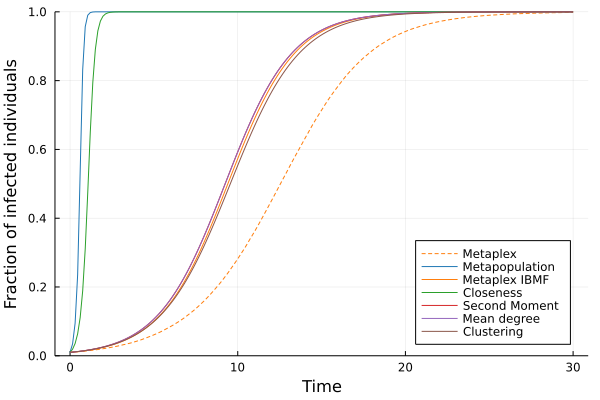

In [18]:
plot(ts_av_mpx, sum(u_av_mpx[2], dims=2)/N,
    label="Metaplex",
    xlabel="Time",
    ylabel="Fraction of infected individuals",
    linestyle=:dash,
    legend=:bottomright,
    color = colors[2],
    ylims = (0.0,1.0)
    )
    plot!(ts_mf, sum(u_mf[2], dims=2)/N,
    #label="Meanfield (No correction)",
    label = "Metapopulation",
#    xlabel="Time",
#    ylabel="Fraction of infected individuals",
    #legend=:bottomright,
    color = colors[1]
    )
    plot!(ts_mf_mpx, sum(u_mf_mpx[2], dims=2)/N,
#    label="Meanfield (Metaplex)",
    label = "Metaplex IBMF",
    color = colors[2]
    )
    plot!(ts_mf_1, sum(u_mf_1[2], dims=2)/N,
#    label="Meanfield (Closeness Centrality)",
    label = "Closeness",
    color = colors[3]
    )
    plot!(ts_mf_2, sum(u_mf_2[2], dims=2)/N,
#    label="Meanfield (Second Moment)",
    label = "Second Moment",
    color = colors[4]
    )
    plot!(ts_mf_3, sum(u_mf_3[2], dims=2)/N,
#    label="Meanfield (Mean degree)",
    label = "Mean degree",
    color = colors[5]
    )
    plot!(ts_mf_4, sum(u_mf_4[2], dims=2)/N,
#    label="Meanfield (Clustering Coefficient)",
    label = "Clustering",
    color = colors[6]
    )